<a href="https://colab.research.google.com/github/martinezseber/PastaPy/blob/main/Treina_Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install tensorflow pandas numpy scikit-learn
%pip install graphviz pydotplus
%pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


In [3]:
def install_and_import(package):
    import importlib
    try:
        importlib.import_module(package)
    except ImportError:
        import pip
        pip.main(['install', package])
    finally:
        globals()[package] = importlib.import_module(package)

# Lista de pacotes a serem instalados e importados
pacotes = ['pandas', 'numpy', 'matplotlib', 'seaborn', 'sklearn','plotly','pingouin','xgboost']

for pacote in pacotes:
    install_and_import(pacote)

import plotly.graph_objects as go
from sklearn.model_selection import train_test_split

#!pip install nbformat --upgrade


/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:31: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Collecting pingouin

Downloading pingouin-0.5.5-py3-none-any.whl.metadata (19 kB)

Requirement already satisfied: matplotlib in /usr/local/lib/python3.10/dist-packages (from pingouin) (3.8.0)

Requirement already satisfied: numpy in /usr/local/lib/python3.10/dist-packages (from pingouin) (1.26.4)

Requirement already satisfied: pandas>=1.5 in /usr/local/lib/python3.10/dist-packages (from pingouin) (2.2.2)

Collecting pandas-flavor (from pingouin)

Downloading pandas_flavor-0.6.0-py3-none-any.whl.metadata (6.3 kB)

Requirement already satisfied: scikit-learn>=1.2 in /usr/local/lib/python3.10/dist-packages (from pingouin) (1.5.2)

Requirement already satisfied: scipy in /usr/local/lib/python3.10/dist-packages (from pingouin) (1.13.1)

Requirement already satisfied: seaborn in /usr/local/lib/python3.10/dist-packages (from pingouin) (0.13.2)

Requirement already satisfied: statsmodels in /usr/local/lib/python3.10/dist-packages (from pingouin) (0.14.4)

Requirement already satisfied: tabulate in /usr/local/lib/python3.10/dist-packages (from pingouin) (0.9.0)

Requirement already satisfied: python-dateutil>=2.8.2 in /usr/local/lib/python3.10/dist-packages (from pandas>=1.5->pingouin) (2.8.2)

Requirement already satisfied: pytz>=2020.1 in /usr/local/lib/python3.10/dist-packages (from pandas>=1.5->pingouin) (2024.2)

Requirement already satisfied: tzdata>=2022.7 in /usr/local/lib/python3.10/dist-packages (from pandas>=1.5->pingouin) (2024.2)

Requirement already satisfied: joblib>=1.2.0 in /usr/local/lib/python3.10/dist-packages (from scikit-learn>=1.2->pingouin) (1.4.2)

Requirement already satisfied: threadpoolctl>=3.1.0 in /usr/local/lib/python3.10/dist-packages (from scikit-learn>=1.2->pingouin) (3.5.0)

Requirement already satisfied: contourpy>=1.0.1 in /usr/local/lib/python3.10/dist-packages (from matplotlib->pingouin) (1.3.0)

Requirement already satisfied: cycler>=0.10 in /usr/local/lib/python3.10/dist-packages (from matplotlib->pingouin) (0.12.1)

Requirement already satisfied: fonttools>=4.22.0 in /usr/local/lib/python3.10/dist-packages (from matplotlib->pingouin) (4.54.1)

Requirement already satisfied: kiwisolver>=1.0.1 in /usr/local/lib/python3.10/dist-packages (from matplotlib->pingouin) (1.4.7)

Requirement already satisfied: packaging>=20.0 in /usr/local/lib/python3.10/dist-packages (from matplotlib->pingouin) (24.1)

Requirement already satisfied: pillow>=6.2.0 in /usr/local/lib/python3.10/dist-packages (from matplotlib->pingouin) (10.4.0)

Requirement already satisfied: pyparsing>=2.3.1 in /usr/local/lib/python3.10/dist-packages (from matplotlib->pingouin) (3.2.0)

Requirement already satisfied: xarray in /usr/local/lib/python3.10/dist-packages (from pandas-flavor->pingouin) (2024.10.0)

Requirement already satisfied: patsy>=0.5.6 in /usr/local/lib/python3.10/dist-packages (from statsmodels->pingouin) (0.5.6)

Requirement already satisfied: six in /usr/local/lib/python3.10/dist-packages (from patsy>=0.5.6->statsmodels->pingouin) (1.16.0)

Downloading pingouin-0.5.5-py3-none-any.whl (204 kB)

Output()

Downloading pandas_flavor-0.6.0-py3-none-any.whl (7.2 kB)

Installing collected packages: pandas-flavor, pingouin

Successfully installed pandas-flavor-0.6.0 pingouin-0.5.5

In [4]:
# Importando os pacotes necessários
#%load_ext cudf.pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import datetime

# Função para instalar pacotes (em ambiente Jupyter, por exemplo)


In [5]:

# Função para Normalizar matrizes
def normalizando(mat):
    scaler = StandardScaler()
    return scaler.fit_transform(mat)

print("Função normalizando definida")




Função normalizando definida


In [6]:
# Carrega dados da tabela CSV
from google.colab import drive
drive.mount('/content/drive')
caminho = '/content/drive/MyDrive/Colab_Dados/exportaAI.csv'
tab_Entrada = pd.read_csv(caminho,sep=";")

# Remove variável tab_teste se existir
if 'tab_teste' in locals():
    del tab_teste

print(tab_Entrada.shape)
print(tab_Entrada.info())


Mounted at /content/drive
(86426, 39)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86426 entries, 0 to 86425
Data columns (total 39 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DateTime      86426 non-null  object
 1   Cap_Com_B1    86426 non-null  int64 
 2   Cap_Com_B2    86426 non-null  int64 
 3   Cap_Com_B3    86426 non-null  int64 
 4   Cap_Sts_B1    86426 non-null  int64 
 5   Cap_Sts_B2    86426 non-null  int64 
 6   Cap_Sts_B3    86426 non-null  int64 
 7   Cap_Def_B1    86426 non-null  int64 
 8   Cap_Def_B2    86426 non-null  int64 
 9   Cap_Def_B3    86426 non-null  int64 
 10  Cap_Sts_V1    86426 non-null  int64 
 11  Cap_Sts_V2    86426 non-null  int64 
 12  Cap_Sts_V3    86426 non-null  int64 
 13  Eta_Com_B1    86426 non-null  int64 
 14  Eta_Com_B2    86426 non-null  int64 
 15  Eta_Com_B3    86426 non-null  int64 
 16  Eta_Com_Boo1  86426 non-null  int64 
 17  Eta_Com_Boo2  86426 non-null  int64 
 18  Eta_AutM

In [7]:

# Tratamento dos dados - criar base apenas com os dados que importam
# Converte string em Data no formato correto
#tab_Entrada['DateBr'] = pd.to_datetime(tab_Entrada['DateTime'], dayfirst=True, format="%d/%m/%y %H:%M:%S")
tab_Entrada['DateBr'] = pd.to_datetime(tab_Entrada['DateTime'], dayfirst=True, format="%d/%m/%Y %H:%M")

# Cria vetores das colunas de hora e de dia da semana e adiciona ao dataframe
tab_Entrada['hora'] = tab_Entrada['DateBr'].dt.hour
tab_Entrada['diasem'] = tab_Entrada['DateBr'].dt.weekday

#substitui as virgulas nos valores float
tab_Entrada['NivApoado'] = tab_Entrada['NivApoado'].str.replace(',', '.')
tab_Entrada['NivElevado'] = tab_Entrada['NivElevado'].str.replace(',', '.')

#converte valores de niveis para floats
tab_Entrada['NivApoiado']= pd.to_numeric(tab_Entrada['NivApoado'])
tab_Entrada['NivElevado']= pd.to_numeric(tab_Entrada['NivElevado'])


In [8]:

#Apaga campo Apoado
# Remove campos que começam com nome Date
tab_Entrada = tab_Entrada.drop(columns=['NivApoado'])

#Mostra resultado
print(tab_Entrada.shape)
print(tab_Entrada.info())


(86426, 42)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86426 entries, 0 to 86425
Data columns (total 42 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DateTime      86426 non-null  object        
 1   Cap_Com_B1    86426 non-null  int64         
 2   Cap_Com_B2    86426 non-null  int64         
 3   Cap_Com_B3    86426 non-null  int64         
 4   Cap_Sts_B1    86426 non-null  int64         
 5   Cap_Sts_B2    86426 non-null  int64         
 6   Cap_Sts_B3    86426 non-null  int64         
 7   Cap_Def_B1    86426 non-null  int64         
 8   Cap_Def_B2    86426 non-null  int64         
 9   Cap_Def_B3    86426 non-null  int64         
 10  Cap_Sts_V1    86426 non-null  int64         
 11  Cap_Sts_V2    86426 non-null  int64         
 12  Cap_Sts_V3    86426 non-null  int64         
 13  Eta_Com_B1    86426 non-null  int64         
 14  Eta_Com_B2    86426 non-null  int64         
 15  Eta_Com_B3    86426 non-

In [9]:

# Unifica bombas da captação em campo Bomba adicionado
tab_Entrada['Bomba'] = tab_Entrada[['Cap_Com_B1', 'Cap_Com_B2', 'Cap_Com_B3']].any(axis=1).astype(int)

# Remove campos que começam com nome Cap
tab_Entrada = tab_Entrada.loc[:, ~tab_Entrada.columns.str.startswith('Cap_')]

# Remove campos que começam com nome Date
tab_Entrada = tab_Entrada.loc[:, ~tab_Entrada.columns.str.startswith('Date')]

#Remove registros com Niveis inválidos
tab_Entrada = tab_Entrada[tab_Entrada['NivApoiado'] >= 1.0]
tab_Entrada = tab_Entrada[tab_Entrada['NivElevado'] >= 0.1]

#Mostra resultado
#print(tab_Entrada.shape)
#print(tab_Entrada.info())

In [10]:

# Determina quais variáveis são relevantes e mantêm a tabela apenas com elas
desvios = tab_Entrada.std()
print(desvios)

# Cria um vetor "rejeitados" contendo os nomes das colunas cujo desvio padrão é zero
rejeitados = desvios[desvios == 0].index
print(rejeitados)

# Remove essas colunas rejeitadas
tab_Entrada = tab_Entrada.drop(columns=rejeitados)
#Mostra resultado
#print(tab_Entrada.shape)
#print(tab_Entrada.info())

Eta_Com_B1      0.234213
Eta_Com_B2      0.244009
Eta_Com_B3      0.499990
Eta_Com_Boo1    0.376098
Eta_Com_Boo2    0.409090
Eta_AutM_B1     0.290912
Eta_AutM_B2     0.282594
Eta_AutM_B3     0.636582
Eta_Def_B1      0.006826
Eta_Def_B2      0.005911
Eta_Def_B3      0.027715
Eta_Def_Boo1    0.005911
Eta_Def_Boo2    0.004826
Eta_Sts_Be1     0.250519
Eta_Sts_Be2     0.493480
Eta_Sts_Be3     0.498802
Eta_Sts_Boo1    0.378388
Eta_Sts_Boo2    0.411620
Eta_Sts_Vav1    0.427003
Eta_Sts_Vav2    0.470048
Eta_Sts_Vav3    0.498892
Eta_Sts_Vav4    0.377763
Eta_Sts_Vav5    0.409287
Eta_Sts_Vav6    0.263369
NivElevado      1.126881
hora            6.923310
diasem          1.998415
NivApoiado      0.820424
Bomba           0.442837
dtype: float64
Index([], dtype='object')


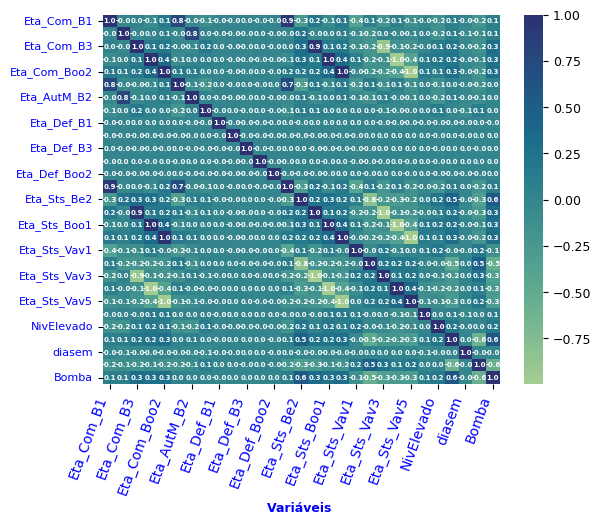

In [11]:

# Calcula matriz de correlação das variáveis que não foram rejeitadas
correEntrada = tab_Entrada.corr()
# Gráfico interativo

corre = tab_Entrada.corr()
heatmap = sns.heatmap(corre, cmap="crest", annot=True, fmt='.1f',annot_kws={
    "size": 5,       # Tamanho da fonte
    "color": "white", # Cor da fonte
    "weight": "bold", # Peso da fonte
})

# Ajusta a fonte dos rótulos dos eixos
plt.xlabel('Variáveis ', fontsize=9, fontweight='bold', color='blue')
plt.ylabel('', fontsize=14, fontweight='bold', color='blue')

# Ajusta a fonte dos rótulos dos ticks dos eixos x e y
plt.xticks(fontsize=10, rotation=70, ha='right', fontweight='light', color='Blue')
plt.yticks(fontsize=8, rotation=0, fontweight='light', color='Blue')

# Ajusta a fonte da legenda lateral (barra de cores)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=9)  # Ajusta o tamanho da fonte dos ticks da barra de cores

plt.show()




In [12]:
correlacoes_com_Bomba = tab_Entrada.corrwith(tab_Entrada['Bomba'])
#print(correlacoes_com_Bomba)


In [13]:

# Verifica se há alguma variável com NA
print(any(correlacoes_com_Bomba.isna()))


False


In [14]:

# Determina o limiar de consideração das variáveis
limiar_baixo = 0.2599
limiar_alto = 1
# Encontra os índices dos campos que têm correlação absoluta maior que o limiar
indices_sig = correlacoes_com_Bomba[(abs(correlacoes_com_Bomba) >= limiar_baixo) & (abs(correlacoes_com_Bomba) <= limiar_alto)].index
print(indices_sig)


Index(['Eta_Com_B3', 'Eta_Com_Boo1', 'Eta_Com_Boo2', 'Eta_Sts_Be2',
       'Eta_Sts_Be3', 'Eta_Sts_Boo1', 'Eta_Sts_Boo2', 'Eta_Sts_Vav2',
       'Eta_Sts_Vav3', 'Eta_Sts_Vav4', 'Eta_Sts_Vav5', 'hora', 'NivApoiado',
       'Bomba'],
      dtype='object')


In [15]:
resultado = pd.DataFrame(correlacoes_com_Bomba.loc[indices_sig,])
resultado['nome'] = indices_sig
print(resultado)

                     0          nome
Eta_Com_B3    0.317156    Eta_Com_B3
Eta_Com_Boo1  0.263261  Eta_Com_Boo1
Eta_Com_Boo2  0.296844  Eta_Com_Boo2
Eta_Sts_Be2   0.561244   Eta_Sts_Be2
Eta_Sts_Be3   0.344244   Eta_Sts_Be3
Eta_Sts_Boo1  0.265528  Eta_Sts_Boo1
Eta_Sts_Boo2  0.300295  Eta_Sts_Boo2
Eta_Sts_Vav2 -0.543384  Eta_Sts_Vav2
Eta_Sts_Vav3 -0.345208  Eta_Sts_Vav3
Eta_Sts_Vav4 -0.264881  Eta_Sts_Vav4
Eta_Sts_Vav5 -0.297243  Eta_Sts_Vav5
hora          0.601779          hora
NivApoiado   -0.570178    NivApoiado
Bomba         1.000000         Bomba


In [16]:

# Limita a tabela para apenas os campos relevantes
tab_Modelos = tab_Entrada[indices_sig]
#print(tab_Modelos.shape)
print(tab_Modelos.info())
#print(indices_sig)

<class 'pandas.core.frame.DataFrame'>
Index: 85857 entries, 0 to 86425
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Eta_Com_B3    85857 non-null  int64  
 1   Eta_Com_Boo1  85857 non-null  int64  
 2   Eta_Com_Boo2  85857 non-null  int64  
 3   Eta_Sts_Be2   85857 non-null  int64  
 4   Eta_Sts_Be3   85857 non-null  int64  
 5   Eta_Sts_Boo1  85857 non-null  int64  
 6   Eta_Sts_Boo2  85857 non-null  int64  
 7   Eta_Sts_Vav2  85857 non-null  int64  
 8   Eta_Sts_Vav3  85857 non-null  int64  
 9   Eta_Sts_Vav4  85857 non-null  int64  
 10  Eta_Sts_Vav5  85857 non-null  int64  
 11  hora          85857 non-null  int32  
 12  NivApoiado    85857 non-null  float64
 13  Bomba         85857 non-null  int64  
dtypes: float64(1), int32(1), int64(12)
memory usage: 9.5 MB
None


A partir daqui estão as rotinas para criação de uma árvore de decisão e random forest

In [17]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import pydotplus
from IPython.display import Image


In [18]:

# Cria a Tabela para entrada na árvore
#tab_dados_arvore = tab_Modelos.drop(columns=['Bomba'])
tab_dados_arvore = tab_Modelos
# Seleciona conjunto de teste e de treino para a árvore
limite_div_Trein_Tst = 0.7
train_data, test_data = train_test_split(tab_dados_arvore, train_size=limite_div_Trein_Tst, random_state=42)

#separa dados para a Random Forest
dfTreino_rf = train_data
dfTeste_rf = test_data


In [19]:

# Criando dataframes escalados para a Neural
scaler = StandardScaler()
dfTreino_nn = pd.DataFrame(scaler.fit_transform(train_data), columns=train_data.columns)
dfTeste_nn = pd.DataFrame(scaler.transform(test_data), columns=test_data.columns)


In [20]:

# Separa dados para xgboost
train_xg = dfTreino_nn.iloc[:, :-1].values
test_xg = dfTeste_nn.iloc[:, :-1].values
train_tgt_xg = dfTreino_nn.iloc[:, -1].values
test_tgt_xg = dfTeste_nn.iloc[:, -1].values


In [21]:
#Carregando pacotes de aferição de acurácia
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

A partir daqui estão as rotinas para criação de uma árvore de decisão e random forest

In [22]:
# Importando pacotes necessários
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [23]:
# Define as features e a target
features = indices_sig.drop('Bomba')
target = 'Bomba'


In [24]:
#print(features)
#print(target)

In [25]:
inicio=datetime.datetime.now()
print(inicio)

2024-11-03 18:44:51.980539


In [26]:

# Treinando o modelo de árvore de decisão
inicio=datetime.datetime.now()
print(inicio)
modelo_Arvore = DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=1, random_state=42)
modelo_Arvore.fit(dfTreino_rf[features], dfTreino_rf[target])
final=datetime.datetime.now()
print(final-inicio)


0:00:09.359137


Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

Fontsize 0.30 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt

[Text(0.5089461994076999, 0.9545454545454546, 'hora <= 6.5\ngini = 0.392\nsamples = 60099\nvalue = [16065.0, 44034.0]\nclass = y[1]'),
 Text(0.2580207305034551, 0.8636363636363636, 'NivApoiado <= 4.305\ngini = 0.34\nsamples = 17405\nvalue = [13629, 3776]\nclass = y[0]'),
 Text(0.3834834649555775, 0.9090909090909092, 'True  '),
 Text(0.13197186574531095, 0.7727272727272727, 'hora <= 3.5\ngini = 0.487\nsamples = 4863\nvalue = [2039, 2824]\nclass = y[1]'),
 Text(0.06077245804540968, 0.6818181818181818, 'Eta_Sts_Vav2 <= 0.5\ngini = 0.305\nsamples = 2805\nvalue = [526, 2279]\nclass = y[1]'),
 Text(0.03652517275419546, 0.5909090909090909, 'Eta_Sts_Be2 <= 0.5\ngini = 0.493\nsamples = 1044\nvalue = [462, 582]\nclass = y[1]'),
 Text(0.02566633761105627, 0.5, 'NivApoiado <= 3.415\ngini = 0.456\nsamples = 661\nvalue = [428, 233]\nclass = y[0]'),
 Text(0.017769002961500493, 0.4090909090909091, 'NivApoiado <= 3.085\ngini = 0.376\nsamples = 557\nvalue = [417, 140]\nclass = y[0]'),
 Text(0.0098716683

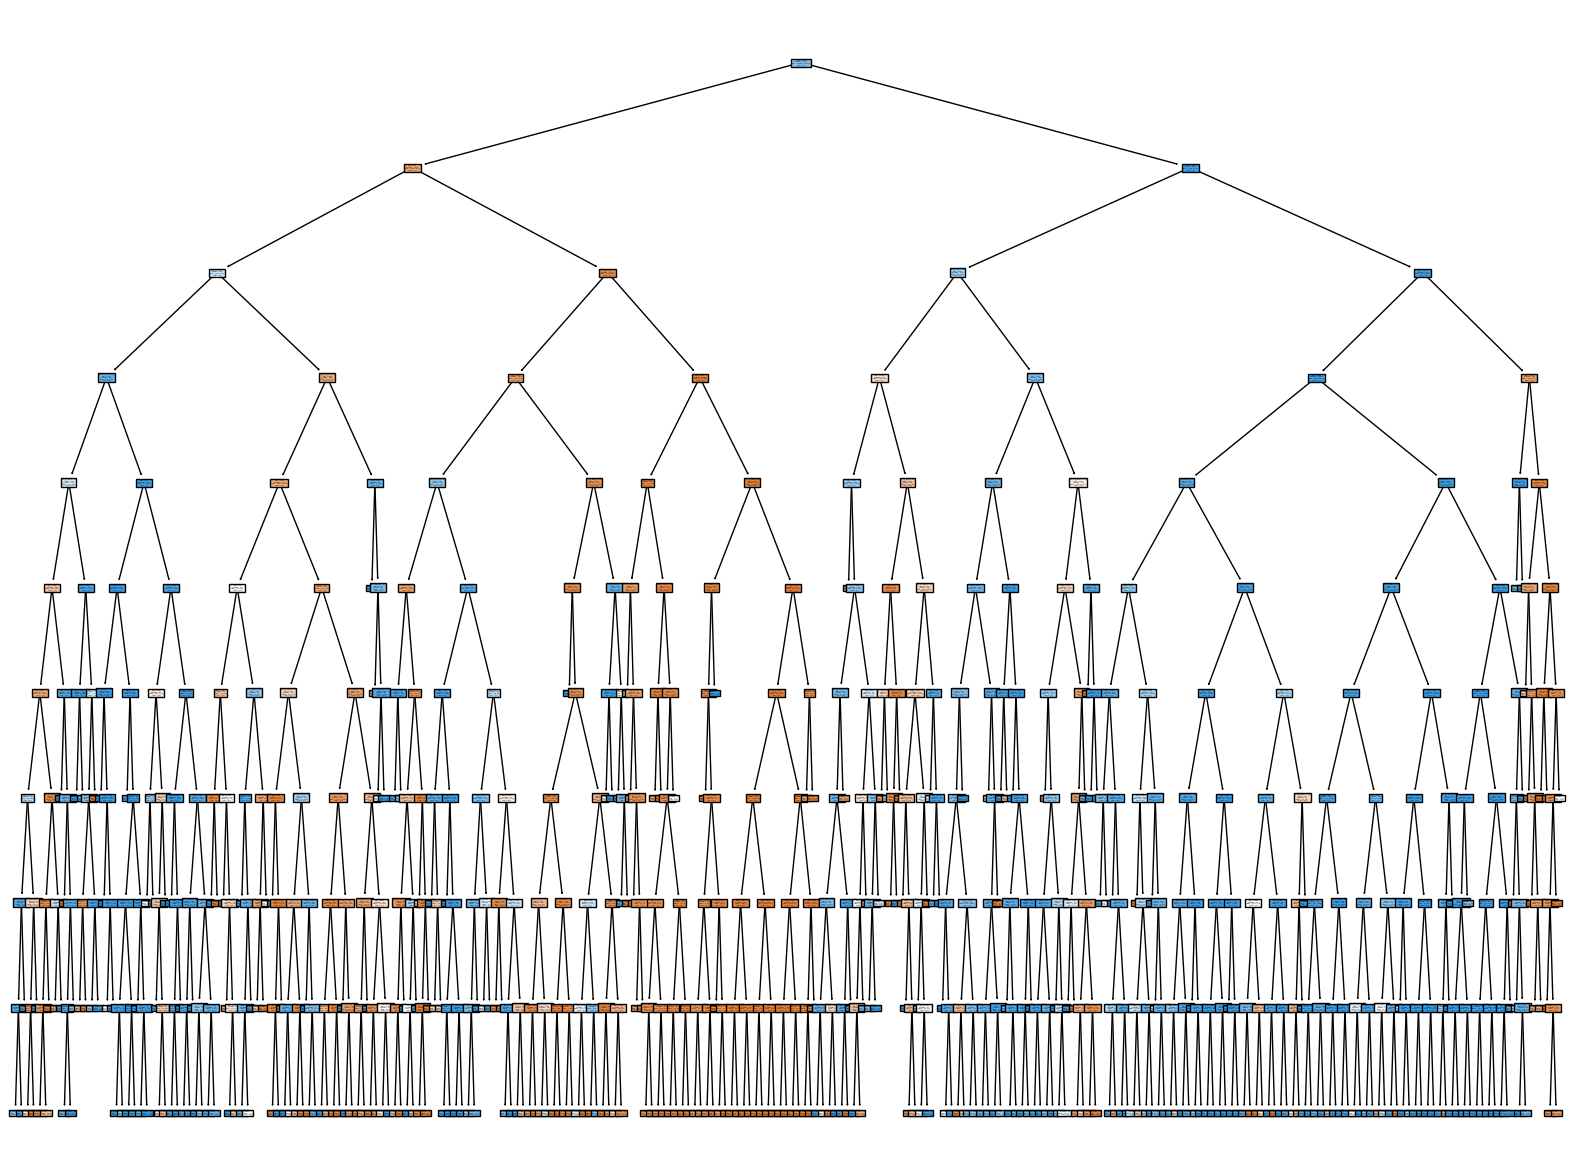

In [27]:

# Plotando a árvore de decisão
plt.figure(figsize=(20,15))
plot_tree(modelo_Arvore, feature_names=features, class_names=True, filled=True)
#plt.show()



In [28]:
# Exportando a árvore para o formato DOT
dot_data = export_graphviz(
    modelo_Arvore,
    out_file=None,
    feature_names=features,
    class_names=['0', '1'],
    filled=True,
    rounded=True,
    special_characters=True
)


In [29]:

# Fazendo previsões com o modelo de árvore de decisão
dfPrevisoes = modelo_Arvore.predict(dfTeste_rf[features])
# Tabela de confusão
confusion_matrix_result = confusion_matrix(dfTeste_rf[target], dfPrevisoes)
#print(confusion_matrix_result)


In [30]:
#Gerando indices de aferição de eficácia da árvore
y_real = dfTeste_rf[target]
y_previsto = dfPrevisoes
# Visualizando a matriz de confusão
confusion_matrix_df = pd.DataFrame(confusion_matrix_result, index=modelo_Arvore.classes_, columns=modelo_Arvore.classes_)#Entrada dos valores
# precisão e revocação
precisao = precision_score(y_real, y_previsto)
revocacao = recall_score(y_real, y_previsto)
#F1 score
f1score = f1_score(y_real, y_previsto)
#Acurácia
accuracy = accuracy_score(dfTeste_rf[target], dfPrevisoes)

score_roc = roc_auc_score(y_real, y_previsto)



Tabela de resultados para Arvore
Precisão: 0.9591868811232777
Revocação: 0.9724332076273438
f1score 0.96576462520441
Acurácia: 0.9496078888112431
score_roc 0.9300198068146819


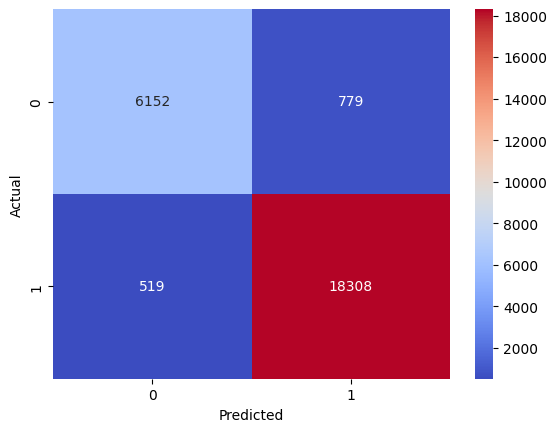

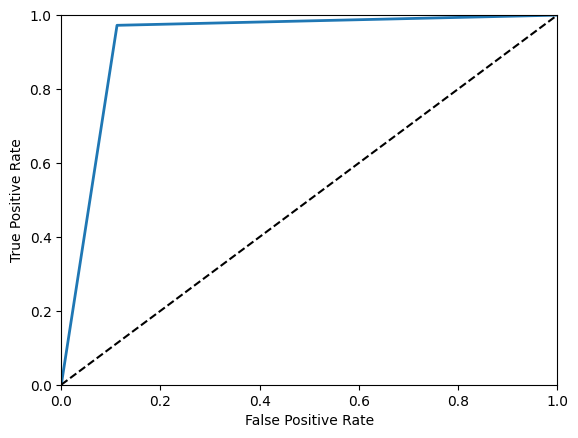

In [31]:
# Impressão dos Resultados
print("Tabela de resultados para Arvore")
print("Precisão:", precisao)
print("Revocação:", revocacao)
print("f1score",f1score)
print("Acurácia:", accuracy)
print("score_roc",score_roc)

sns.heatmap(confusion_matrix_df, annot=True, fmt='d', cmap='coolwarm')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#Apresentação da Curva ROC
fpr, tpr, thresholds = roc_curve(y_real, y_previsto)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

In [32]:
# Normalizando os dados (somente as features, não a variável alvo)
inicio = datetime.datetime.now()
print(inicio)
scaler = StandardScaler()
dfTreino_rf[features] = scaler.fit_transform(dfTreino_rf[features])
dfTeste_rf[features] = scaler.transform(dfTeste_rf[features])

# Treinando o modelo Random Forest
modelo_RF = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=1, random_state=42)
modelo_RF.fit(dfTreino_rf[features], dfTreino_rf[target])
final = datetime.datetime.now()
print(final-inicio)


2024-11-03 18:46:10.481824
0:00:05.975147


In [33]:
# configurando os Parâmetros para otimização da Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]


#   'n_estimators': [50, 100],
#    'max_depth': [5, 10,none],
#    'min_samples_split': [2, 5],
#    'min_samples_leaf': [1, 2],
#    'max_features': ['sqrt','log2'],
#    'bootstrap': [True]
}

In [ ]:
# Otimização dos parâmetros usando Grid Search com validação cruzada
#Alternativas de scoring-
# scoring = ['accuracy', 'roc_auc', 'precision', 'recall', 'f1', 'neg_log_loss']
# tempo de execução - 21 minutos
inicio = datetime.datetime.now()
print(inicio)

grid_search = GridSearchCV(
    estimator=modelo_RF,
    param_grid=param_grid,
    cv=5, scoring='accuracy',
    verbose=2,
    n_jobs=-1,
    error_score='raise'
    )
grid_search.fit(dfTreino_rf[features], dfTreino_rf[target])

final = datetime.datetime.now()
print(final-inicio)

2024-11-03 18:46:42.023776
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


In [ ]:
# Melhor modelo encontrado
best_model = grid_search.best_estimator_
modelo_RF = best_model
print(best_model)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=50, random_state=42)


In [ ]:

# Fazendo previsões com o modelo de random forest
dfPrevisoes = modelo_RF.predict(dfTeste_rf[features])
# Tabela de confusão
confusion_matrix_result = confusion_matrix(dfTeste_rf[target], dfPrevisoes)
#print(confusion_matrix_result)


Tabela de resultados para Random Forest
Precisão: 0.9591868811232777
Revocação: 0.9724332076273438
f1score 0.96576462520441
Acurácia: 0.9496078888112431
score_roc 0.9300198068146819


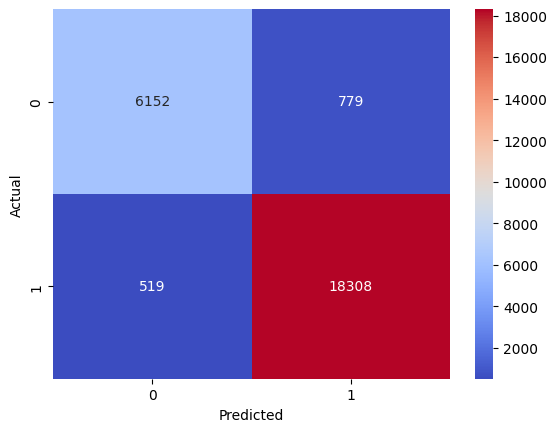

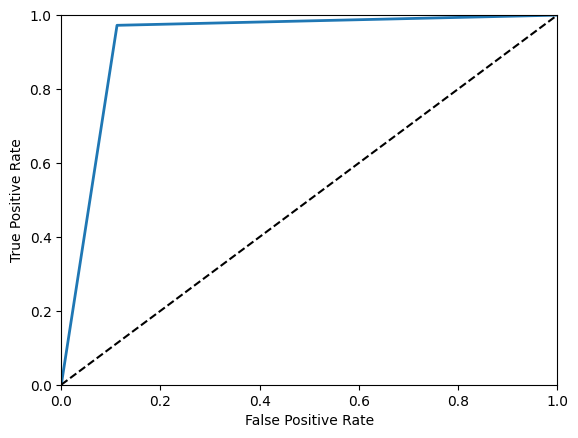

In [ ]:
# Impressão dos Resultados
print("Tabela de resultados para Random Forest")

print("Precisão:", precisao)
print("Revocação:", revocacao)
print("f1score",f1score)
print("Acurácia:", accuracy)
print("score_roc",score_roc)

sns.heatmap(confusion_matrix_df, annot=True, fmt='d', cmap='coolwarm')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#Apresentação da Curva ROC
fpr, tpr, thresholds = roc_curve(y_real, y_previsto)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:

# Usando pydotplus para gerar a imagem
graph = pydotplus.graph_from_dot_data(dot_data)


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.839104 to fit



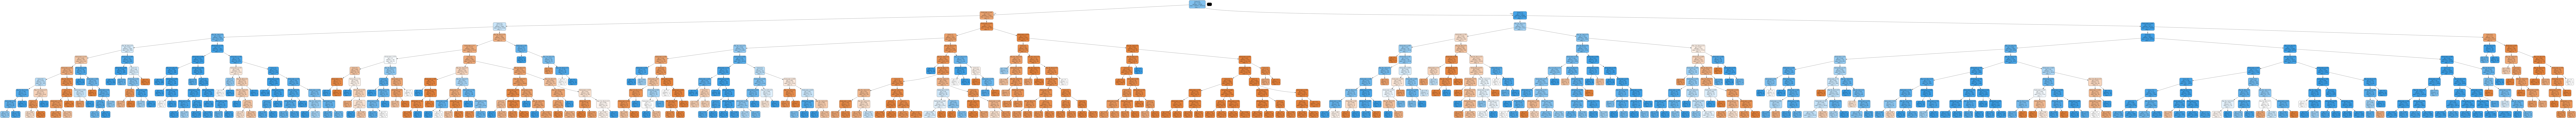

In [ ]:

# Visualizando a imagem da árvore de decisão
Image(graph.create_png())

A partir daqui está o script para o modelo em Rede Neural

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import roc_auc_score


In [ ]:
# Define as features e a target
features = indices_sig.drop('Bomba')
target = 'Bomba'

# Preparando os dados de treino e teste
X_train = dfTreino_nn[features].values
y_train = dfTreino_nn[target].values
X_test = dfTeste_nn[features].values
y_test = dfTeste_nn[target].values

y_test = (y_test>0.5).astype(int)
#print(y_test)

In [ ]:
# Definindo o modelo de rede neural
model_nn = Sequential()
model_nn.add(Input(shape=(len(features),)))
model_nn.add(Dense(13, activation='sigmoid'))
model_nn.add(Dense(6, activation='sigmoid'))
model_nn.add(Dense(1, activation='sigmoid'))  # Saída para classificação binária

In [ ]:
# Compilando o modelo de Rede Neural
model_nn.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [ ]:
# Treinando o modelo de Rede Neural
inicio = datetime.datetime.now()
print(inicio)
model_nn.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)
#model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)
final = datetime.datetime.now()
print(final-inicio)

Epoch 1/100
6010/6010 ━━━━━━━━━━━━━━━━━━━━ 4s 647us/step - accuracy: 0.0000e+00 - loss: -2.2729
Epoch 2/100
6010/6010 ━━━━━━━━━━━━━━━━━━━━ 4s 657us/step - accuracy: 0.0000e+00 - loss: -12.3993
Epoch 3/100
6010/6010 ━━━━━━━━━━━━━━━━━━━━ 4s 641us/step - accuracy: 0.0000e+00 - loss: -22.8407
Epoch 4/100
6010/6010 ━━━━━━━━━━━━━━━━━━━━ 4s 644us/step - accuracy: 0.0000e+00 - loss: -32.7803
Epoch 5/100
6010/6010 ━━━━━━━━━━━━━━━━━━━━ 4s 648us/step - accuracy: 0.0000e+00 - loss: -43.0223
Epoch 6/100
6010/6010 ━━━━━━━━━━━━━━━━━━━━ 4s 638us/step - accuracy: 0.0000e+00 - loss: -53.4426
Epoch 7/100
6010/6010 ━━━━━━━━━━━━━━━━━━━━ 4s 652us/step - accuracy: 0.0000e+00 - loss: -63.7773
Epoch 8/100
6010/6010 ━━━━━━━━━━━━━━━━━━━━ 4s 648us/step - accuracy: 0.0000e+00 - loss: -73.1219
Epoch 9/100
6010/6010 ━━━━━━━━━━━━━━━━━━━━ 4s 639us/step - accuracy: 0.0000e+00 - loss: -85.3978
Epoch 10/100
6010/6010 ━━━━━━━━━━━━━━━━━━━━ 4s 645us/step - accuracy: 0.0000e+00 - loss: -94.9913
Epoch 11/100
6010/6010 ━━━━━━━

In [ ]:
import keras_tuner as kt
from tensorflow.keras import layers


In [ ]:

# Função para construir o modelo com parâmetros variáveis
def build_model(hp):
    model = Sequential()

    # Número de camadas ocultas
    for i in range(hp.Int('num_layers', 1, 3)):  # Testa de 1 a 3 camadas
        model.add(layers.Dense(
            units=hp.Int('units_' + str(i), min_value=4, max_value=32, step=4),  # Neurônios de 4 a 32, pulando de 4 em 4
            activation='sigmoid'
        ))

    # Camada de saída
    model.add(layers.Dense(1, activation='sigmoid'))  # Classificação binária

    # Compilação do modelo
    # model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[metrics.AUC(), metrics.Precision(), metrics.Recall()])

    model.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model


In [ ]:

# Inicialização do Keras Tuner

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Número de tentativas para diferentes configurações
    executions_per_trial=3,  # Número de vezes que cada configuração será treinada
    directory='my_dir',
    project_name='helloworld'
)
# 25 minutos de execução
# Dados de treinamento e validação
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Melhor modelo encontrado
best_model = tuner.get_best_models(num_models=1)[0]

# Resumo do melhor modelo
best_model.summary()


Trial 5 Complete [00h 05m 04s]
val_accuracy: 0.9434221188227335

Best val_accuracy So Far: 0.9462432463963827
Total elapsed time: 00h 25m 28s


c:\Users\seber\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 28)             │           392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 28)             │           812 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,325 (5.18 KB)

 Trainable params: 1,325 (5.18 KB)

 Non-trainable params: 0 (0.00 B)

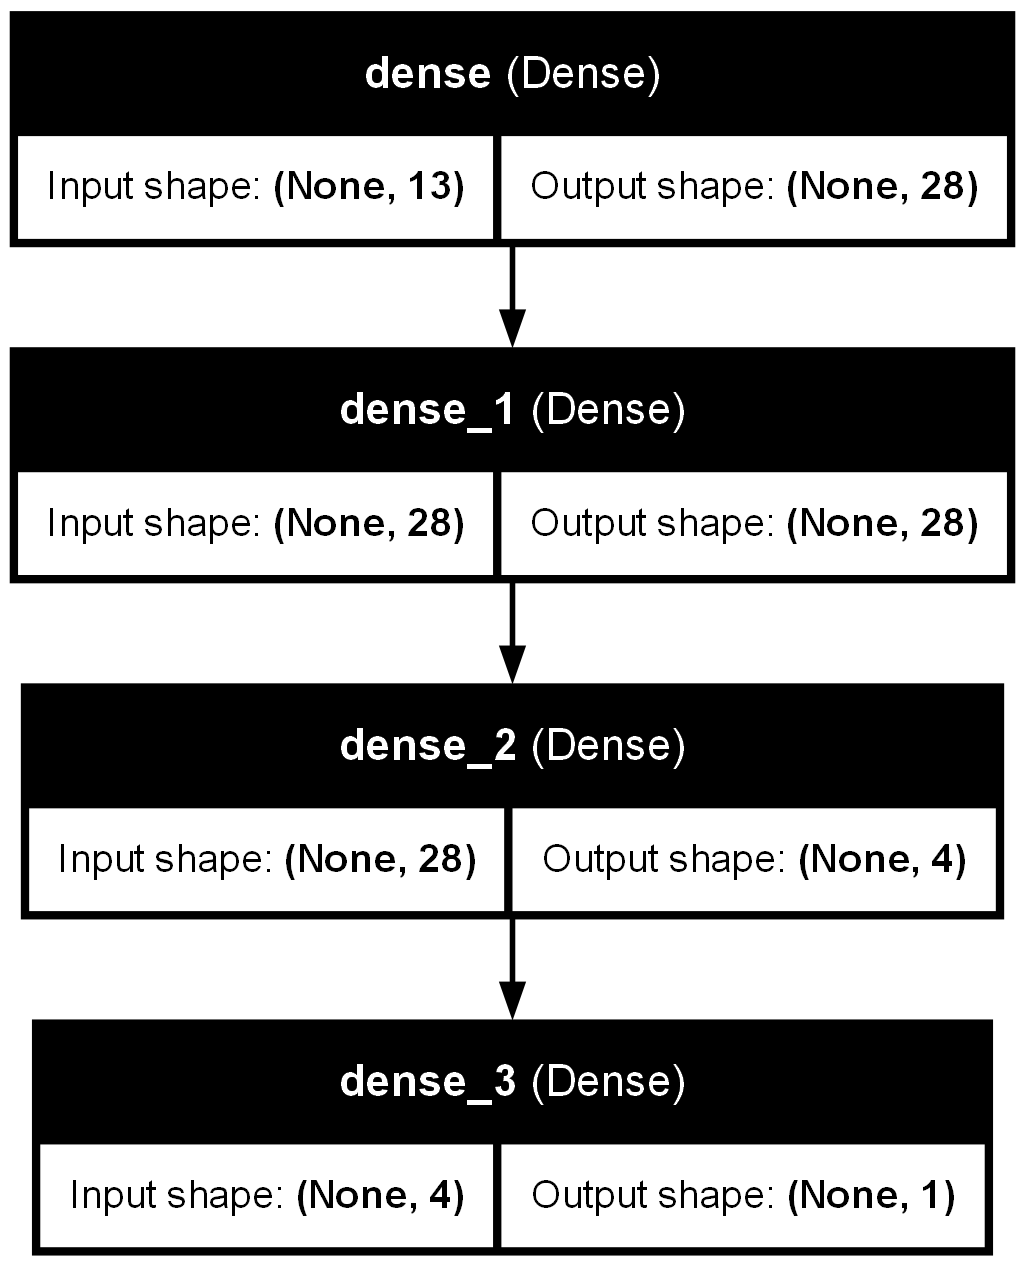

In [ ]:
from tensorflow.keras.utils import plot_model

# Gera um gráfico da rede neural
#plot_model(model_nn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
plot_model(best_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
# Gerando previsões usando o conjunto de teste
#predicted_probabilities = model_nn.predict(X_test)
predicted_probabilities = best_model.predict(X_test)

predicted_classes = (predicted_probabilities > 0.5).astype(int)
print(predicted_classes)



805/805 ━━━━━━━━━━━━━━━━━━━━ 1s 700us/step
[[1]
 [0]
 [0]
 ...
 [1]
 [1]
 [0]]


In [ ]:
#Calculos de indices de aferição de eficácia
#Entrada dos valores
y_real = y_test
y_previsto = predicted_classes

#Gerando indices de aferição de eficácia
# precisão e revocação
precisao = precision_score(y_real, y_previsto)
revocacao = recall_score(y_real, y_previsto)
#F1 score
f1score = f1_score(y_real, y_previsto)
#Acurácia
accuracy = accuracy_score(dfTeste_rf[target], dfPrevisoes)
# Visualizando a matriz de confusão
confusion_matrix_df = confusion_matrix(y_real, y_previsto)

score_roc = roc_auc_score(y_real, y_previsto)


Tabela de rsultados para Neural Net
Precisão: 0.9551857262103506
Revocação: 0.9724863228342274
f1score 0.963758389261745
Acurácia: 0.9522090224396305
score_roc 0.9242751914272133


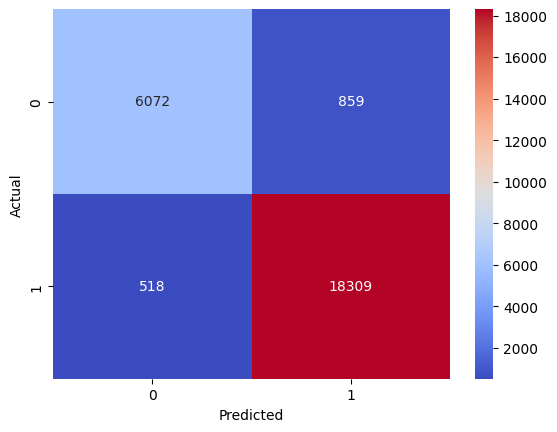

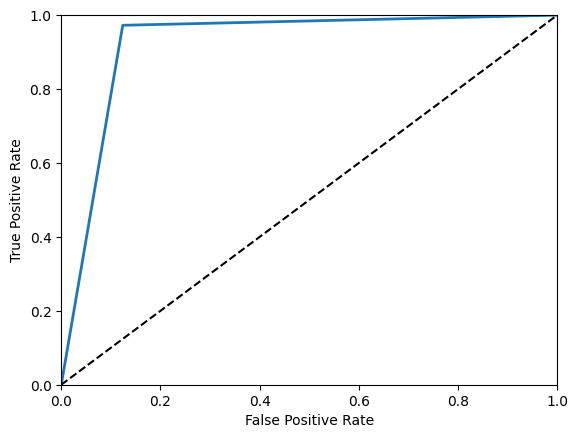

In [ ]:
# Impressão dos Resultados
print("Tabela de rsultados para Neural Net")
print("Precisão:", precisao)
print("Revocação:", revocacao)
print("f1score",f1score)
print("Acurácia:", accuracy)
print("score_roc",score_roc)

sns.heatmap(confusion_matrix_df, annot=True, fmt='d', cmap='coolwarm')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#Apresentação da Curva ROC
fpr, tpr, thresholds = roc_curve(y_real, y_previsto)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Define as features e a target
features = dfTreino_rf.columns.drop('Bomba')  # Removendo 'Bomba' das features
target = 'Bomba'

# Normalizando os dados (somente as features, não a variável alvo)
scaler = StandardScaler()
dfTreino_rf[features] = scaler.fit_transform(dfTreino_rf[features])
dfTeste_rf[features] = scaler.transform(dfTeste_rf[features])

# Preparando os dados para XGBoost
X_train = dfTreino_rf[features]
y_train = dfTreino_rf[target]
X_test = dfTeste_rf[features]
y_test = dfTeste_rf[target]


In [ ]:

# Treinando o modelo XGBoost
#tempo de execução de 6 minutos
#modelo_XGB = xgb.XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.1, random_state=42)
modelo_XGB = xgb.XGBClassifier(n_estimators=100, max_depth=100, learning_rate=0.1, random_state=42)
modelo_XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=100, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Definindo o grid de parâmetros a serem testados no grid search
param_grid = {
    'n_estimators': [100, 200, 300],     # Número de árvores
    'max_depth': [3, 6, 9],              # Profundidade máxima da árvore
    'learning_rate': [0.01, 0.1, 0.2],   # Taxa de aprendizado
    'subsample': [0.6, 0.8, 1.0],        # Proporção de amostras a serem usadas
    'colsample_bytree': [0.6, 0.8, 1.0], # Proporção de recursos a serem usadas em cada árvore
    'gamma': [0, 0.1, 0.2],              # Parâmetro de regularização
    'reg_alpha': [0, 0.1, 1],            # Parâmetro de regularização L1
    'reg_lambda': [1, 1.5, 2]            # Parâmetro de regularização L2
}


In [ ]:
# Definindo o grid de parâmetros a serem testados no random search
param_distributions = {
    'n_estimators': np.arange(100, 1000, 100),  # Número de árvores de 100 a 1000
    'max_depth': np.arange(3, 10, 1),           # Profundidade máxima da árvore de 3 a 10
    'learning_rate': np.linspace(0.01, 0.3, 10),# Taxa de aprendizado entre 0.01 e 0.3
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5],
    'reg_alpha': [0, 0.1, 1, 10],
    'reg_lambda': [1, 1.5, 2, 10]
}


In [ ]:

# Inicializando o GridSearchCV
modelo_XGB = GridSearchCV(
    estimator=modelo_XGB,
    param_grid=param_grid,
    scoring='roc_auc',  # Métrica de avaliação
    cv=3,               # Número de folds para cross-validation
    verbose=1,
    n_jobs=-1           # Usar todos os núcleos disponíveis
)


In [ ]:
# Inicializando o RandomizedSearchCV
modelo_XGB = RandomizedSearchCV(
    estimator=modelo_XGB,
    param_distributions=param_distributions,
    n_iter=50,            # Número de combinações a serem testadas
    scoring='roc_auc',    # Métrica de avaliação
    cv=3,                 # Número de folds para cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1             # Usar todos os núcleos disponíveis
)


In [ ]:

# Realizar o ajuste do GridSearch nos dados de treino
#grid_search.fit(X_train, y_train)

# Realizar o ajuste do RandomSearch nos dados de treino
modelo_XGB.fit(X_train, y_train)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'gamma': [0, 0.1, 0.2, 0.5],
                                        'learning_rate': array([0.01      , 0.04222222, 0.07444444, 0.10666667, 0.13888889,
       0.17111111, 0.20333333, 0.23555556, 0.26777778, 0.3       ]),
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
                                        'reg_alpha': [0, 0.1, 1, 10],
                                        'reg_lambda': [1, 1.5, 2, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [ ]:

# Imprimir os melhores parâmetros encontrados
#print(f"Melhores parâmetros encontrados: {grid_search.best_params_}")
print(f"Melhores parâmetros encontrados: {modelo_XGB.best_params_}")

Melhores parâmetros encontrados: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.1388888888888889, 'gamma': 0.5, 'colsample_bytree': 1.0}


In [ ]:
# Fazendo previsões com o modelo XGBoost
y_previstoXg = modelo_XGB.predict(X_test)

In [ ]:
#Calculos de indices de aferição de eficácia
#Entrada dos valores
y_real = y_test
y_previsto = y_previstoXg
# Visualizando a matriz de confusão
confusion_matrix_df = confusion_matrix(y_real, y_previsto)
# precisão e revocação
precisao = precision_score(y_real, y_previsto)
revocacao = recall_score(y_real, y_previsto)
#F1 score
f1score = f1_score(y_real, y_previsto)
#Acurácia
accuracy = accuracy_score(dfTeste_rf[target], dfPrevisoes)

score_roc = roc_auc_score(y_real, y_previsto)

Tabela de rsultados para XgBoost
Precisão: 0.9638585954375428
Revocação: 0.9717427099378552
f1score 0.9677845958527296
Acurácia: 0.9522090224396305
score_roc 0.9363835465718708


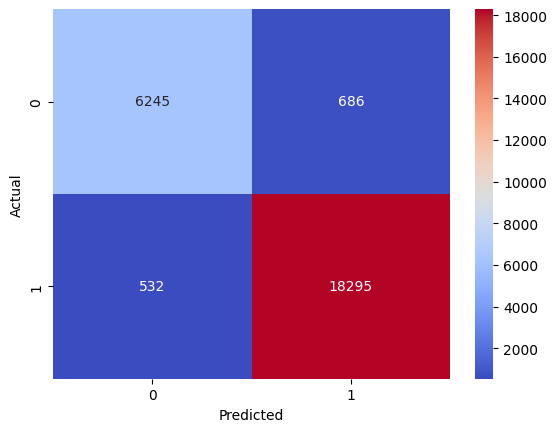

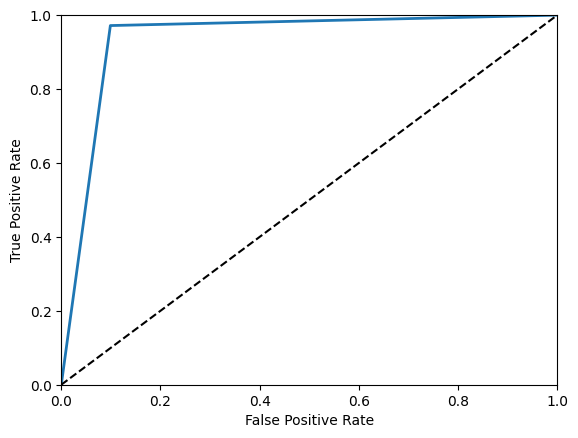

In [ ]:
# Impressão dos Resultados
print("Tabela de rsultados para XgBoost")
print("Precisão:", precisao)
print("Revocação:", revocacao)
print("f1score",f1score)
print("Acurácia:", accuracy)
print("score_roc",score_roc)

sns.heatmap(confusion_matrix_df, annot=True, fmt='d', cmap='coolwarm')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#Apresentação da Curva ROC
fpr, tpr, thresholds = roc_curve(y_real, y_previsto)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()